# Ex1:
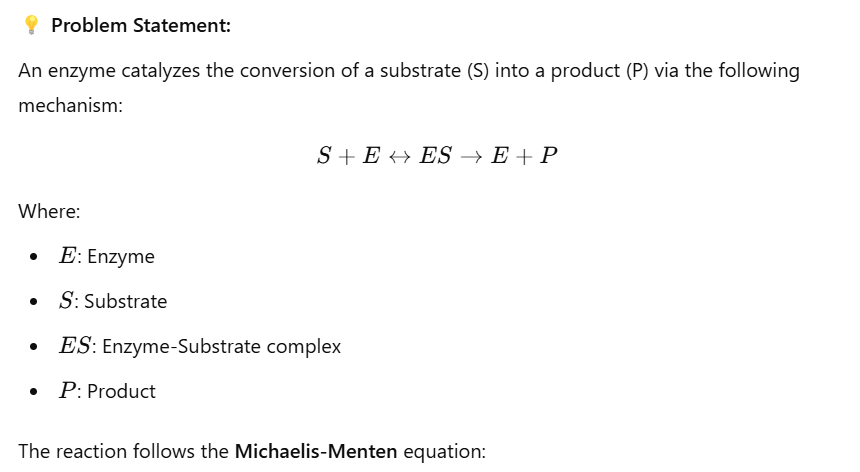
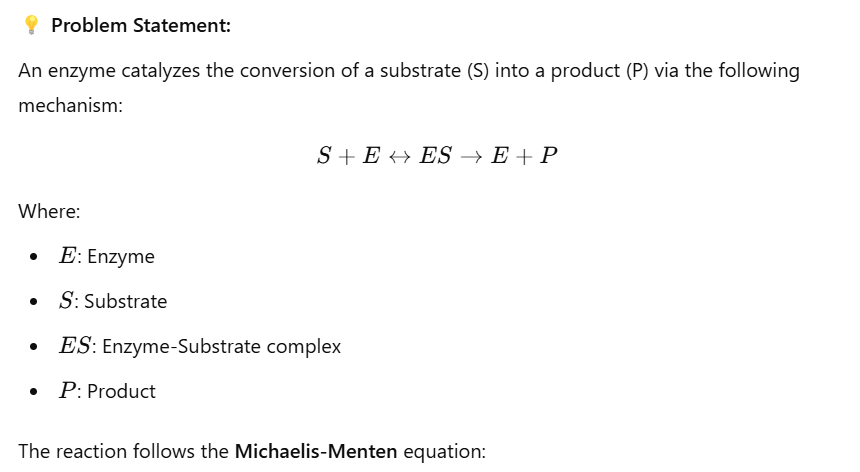
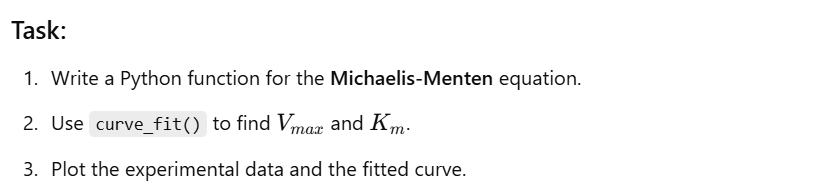

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Substrate concentrations [S] in mol/L
S = np.array([0.001, 0.005, 0.01, 0.05, 0.1])

# Reaction rates v in mol/L.s
v = np.array([0.05, 0.2, 0.33, 0.45, 0.49])

In [18]:
# r'$K_M = \frac{k_{-1} + k_2}{k_1}$'

from scipy.optimize import curve_fit
def func_v(S, Vmax, Km):
    return Vmax*S/(Km+S)
popt, pcov = curve_fit(func_v, S, v, p0=(0.5, 0.1))
Vmax, Km=popt

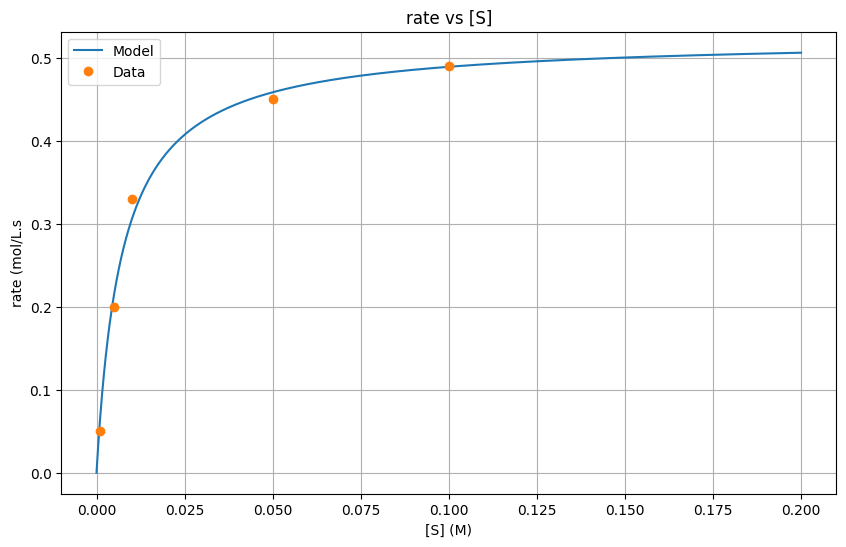

In [25]:
S_data=np.linspace(0,0.2,100000)
v_data=func_v(S_data, Vmax, Km)
plt.figure(figsize=(10,6))
plt.plot(S_data, v_data, label='Model')
plt.plot(S,v,'o',label='Data')
plt.xlabel('[S] (M)')
plt.ylabel('rate (mol/L.s')
plt.title('rate vs [S]')
plt.grid(True);
plt.legend();

In [26]:
print(f'Vmax = {Vmax:.2f} (mol/L.s)\nKm = {Km:.2f} (mol/L)')

Vmax = 0.52 (mol/L.s)
Km = 0.01 (mol/L)


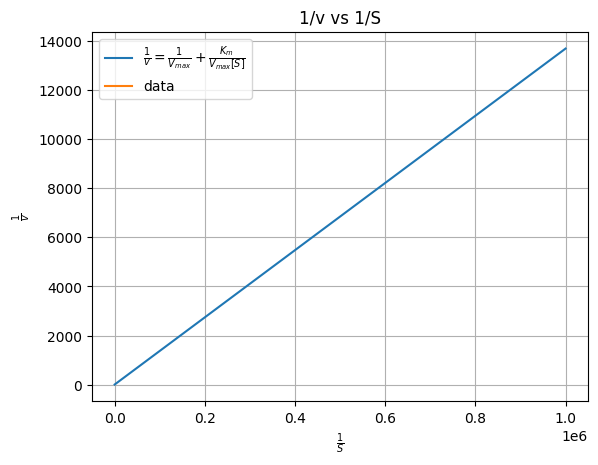

In [27]:
S0=np.linspace(1e-6,1,1000)
v0=[func_v(S, Vmax, Km) for S in S0]

v1=1/np.array(v0)
S1=1/S0
plt.plot(S1,v1, label=r'$\frac{1}{v} = \frac{1}{V_{max}} + \frac{K_m}{V_{max}[S]}$')
plt.plot(S,v,label='data')
plt.xlabel(r'$\frac{1}{S}$')
plt.ylabel(r'$\frac{1}{v}$')
plt.title('1/v vs 1/S')
plt.legend()
plt.grid(True);


# Exercise 2
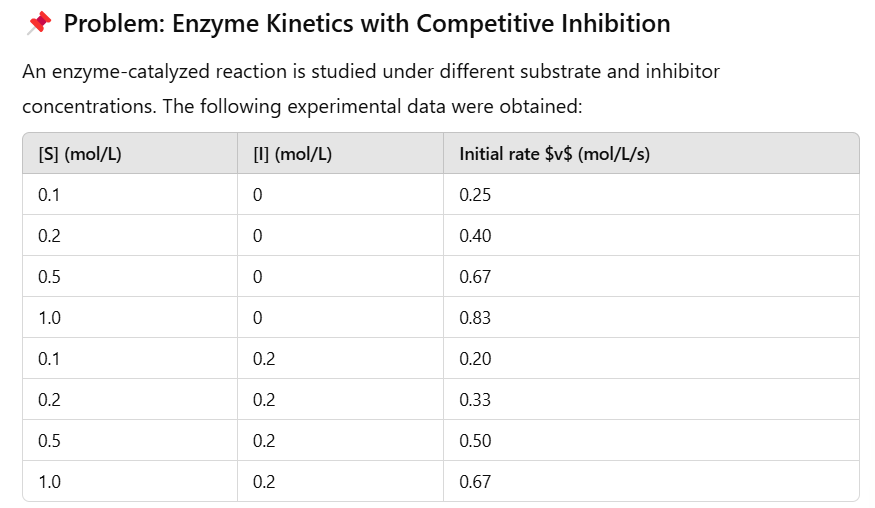
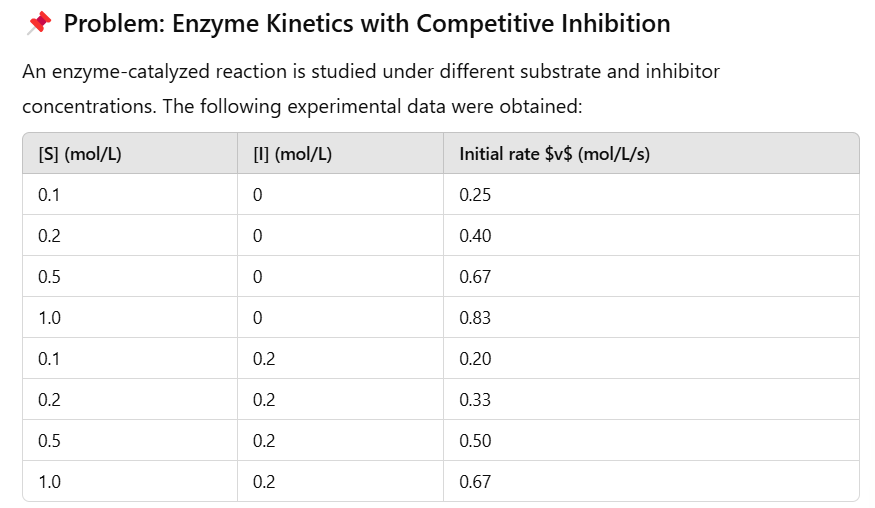

In [28]:
import numpy as np

# Substrate concentration [S]
S = np.array([0.1, 0.2, 0.5, 1.0, 0.1, 0.2, 0.5, 1.0])

# Inhibitor concentration [I]
I = np.array([0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2])

# Initial rates v (mol/L/s)
v = np.array([0.25, 0.40, 0.67, 0.83, 0.20, 0.33, 0.50, 0.67])
E0 = 1e-6  # Enzyme concentration (mol/L)

In [29]:
from scipy.optimize import curve_fit
def Michaelis_inhibit(S_I, Vmax, Km, KI):
    S,I=S_I
    return Vmax*S/(Km*(1+I/KI)+S)
popt, pcov = curve_fit(Michaelis_inhibit, xdata=(S, I), ydata=v,p0=(1,1,1))
Vmax, Km, KI = popt

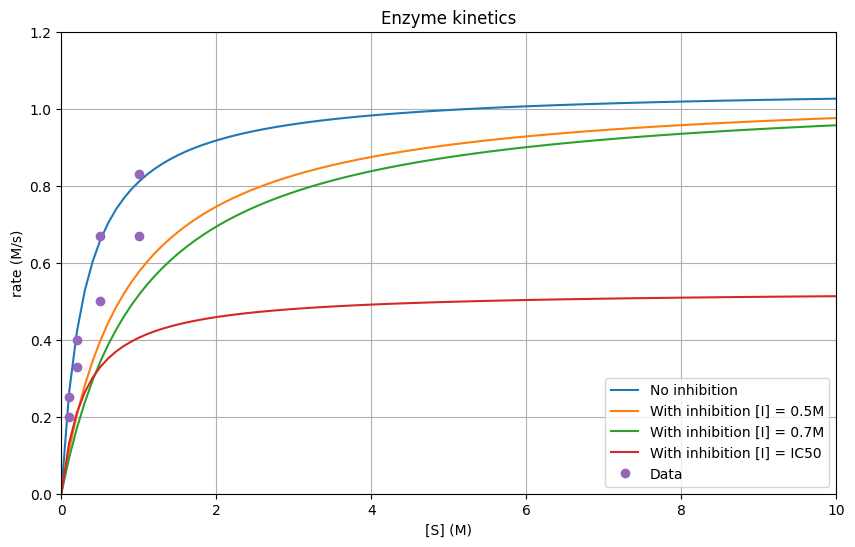

In [30]:
import matplotlib.pyplot as plt
S1=np.linspace(0,10,100)
I1=[0.5]*100
I2=[0.7]*100
#when no inhibition I:
def func_v(S, Vmax, Km):
    return Vmax*S/(Km+S)
v4=[func_v(Si, Vmax, Km) for Si in S1]
plt.figure(figsize=(10,6))
plt.plot(S1,v4, label='No inhibition')

def IC50(S, Km, KI):
    return KI*(S/Km+1)
IC50_1 = [IC50(Si,Km,KI) for Si in S1]
#when [I]=0.5M and [I]=0.7M:
v1=[Michaelis_inhibit((S1[i],I1[i]), Vmax, Km, KI) for i in range(100)]
v2=[Michaelis_inhibit((S1[i],I2[i]), Vmax, Km, KI) for i in range(100)]
v3=[Michaelis_inhibit((S1[i],IC50_1[i]), Vmax, Km, KI) for i in range(100)]


plt.plot(S1,v1, label='With inhibition [I] = 0.5M')
plt.plot(S1,v2, label='With inhibition [I] = 0.7M')
plt.plot(S1,v3, label='With inhibition [I] = IC50')
plt.plot(S,v,'o', label='Data')

plt.title('Enzyme kinetics')
plt.xlabel('[S] (M)')
plt.ylabel('rate (M/s)')
plt.xlim(0,10)
plt.ylim(0,1.2)
plt.grid(True)
plt.legend();

IC50: find [I] that v=v0/2 
IC50 được định nghĩa là nồng độ chất ức chế cần thiết để làm giảm tốc độ phản ứng còn 50% so với tốc độ ban đầu v0 (tức là tốc độ khi không có chất ức chế).




EC50: find [S] that v=vmax/2

In [31]:
from scipy.optimize import fsolve
def func_v1(S):
    return Vmax*S/(Km+S)-Vmax/2
EC50 = fsolve(func_v1,x0=0.05)

kcat=Vmax/E0
print(f'kcat (k2) = {kcat:.2f}\nCatalytic efficiency kcat/Km = {kcat/Km:.2f}\nEC50 (no inhibition) = {EC50[0]:.4f} (M)')

kcat (k2) = 1057356.06
Catalytic efficiency kcat/Km = 3468781.34
EC50 (no inhibition) = 0.3048 (M)


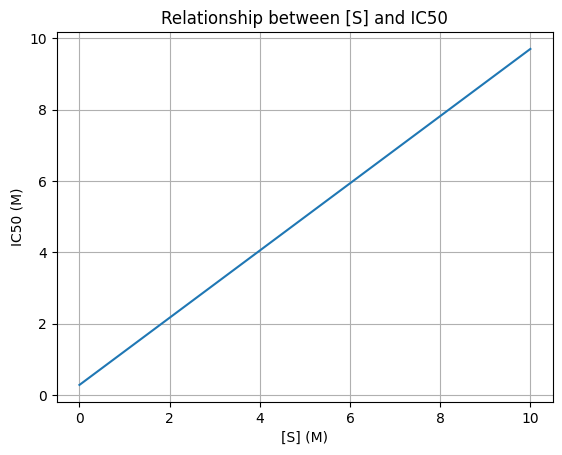

In [33]:
plt.plot(S1, IC50_1)
plt.grid(True)
plt.xlabel('[S] (M)')
plt.ylabel('IC50 (M)')
plt.title('Relationship between [S] and IC50');